

# Project: Noshowappointment Data Analysis

### Python Code

#### Import the libraries used

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Reading the information about the dataset like the number of columns,rows,datatypes of the columns and null values if any.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 
#### Converting the columns ScheduledDay, AppointmentDay to datettime types

In [5]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#### Columns ScheduledDay,AppointmentDay should be separated with date and time in separate columns.

In [6]:

df['Scheduled_Date'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['Scheduled_Time'] = pd.to_datetime(df['ScheduledDay']).dt.time
df['Appointment_Date'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['Appointment_Time'] = pd.to_datetime(df['AppointmentDay']).dt.time
df.drop(['ScheduledDay','AppointmentDay'],inplace=True,axis=1)

#### Cleaning of Age Column : few negative and 0 values in Age are dropped

In [7]:
val=df[df['Age']<=0].index
df.drop(val,inplace=True)

#### Renaming of the columns to increase the quality of the code

In [8]:
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension','No-show':'No_show'},inplace=True)


#### PatientId is in float so need to be changed to int

In [9]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

#### Dropping the rows with awaited days in negative ( as the Scheduled _Date should always be before the Appointment_Date)

In [10]:
df['awaited_days'] = (df['Appointment_Date']-df['Scheduled_Date']).dt.days
del_ind=df[df['awaited_days']<0].index
df.drop(del_ind,inplace=True)

#### Changing the mapping of the column 'No_show' for Yes-> No and No-> Yes (as given in the dataset directions)

In [11]:
df_map = {'Yes': 'No', 'No': 'Yes'}
df['No_show'] = df['No_show'].map(df_map)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,awaited_days
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23,2016-04-29,00:00:00,0


### Validating the dataset after cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 17 columns):
PatientId           106982 non-null int64
AppointmentID       106982 non-null int64
Gender              106982 non-null object
Age                 106982 non-null int64
Neighbourhood       106982 non-null object
Scholarship         106982 non-null int64
Hypertension        106982 non-null int64
Diabetes            106982 non-null int64
Alcoholism          106982 non-null int64
Handicap            106982 non-null int64
SMS_received        106982 non-null int64
No_show             106982 non-null object
Scheduled_Date      106982 non-null object
Scheduled_Time      106982 non-null object
Appointment_Date    106982 non-null object
Appointment_Time    106982 non-null object
awaited_days        106982 non-null int64
dtypes: int64(10), object(7)
memory usage: 14.7+ MB


In [13]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,awaited_days
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,2016-04-29,16:07:23,2016-04-29,00:00:00,0


##### Now after trimming and cleaning the data,we will move to the exploration.With the help of statistics and visualisations, will address few questions. By Looking at one variable at a time, and then following it up by looking at relationships between variables.
<a id='eda'></a>
## Exploratory Data Analysis

#### Correlation matrix to see the relationship between variables

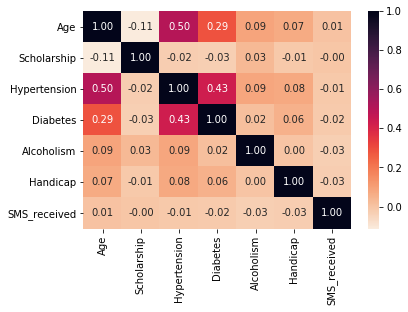

In [21]:
stats_corr=['Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']
ax=sns.heatmap(df[stats_corr].corr(),annot=True,fmt='.2f',cmap='rocket_r');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

#### Based on the above heatmap, we can say that:
> Age and Hypertension are highly correlated and Hypertension and Diabetes are moderately correlated<br>
>Age and Diabetes show low correlation

### Research Question 1: What is the Showup vs No Showup appointment statistics?

In [14]:
y=df['No_show'].value_counts()
y

Yes    85307
No     21675
Name: No_show, dtype: int64

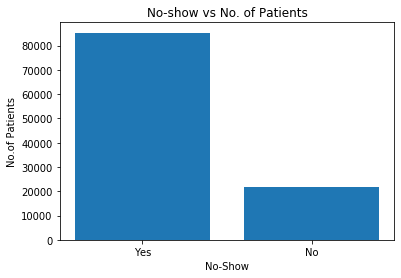

In [15]:
ind=['Yes','No']
plt.bar(ind,y);
plt.xlabel('No-Show');
plt.ylabel('No.of Patients');
plt.title("No-show vs No. of Patients");

> #### Based on the above graph, we can say that:<br>
> More number of patients showed up for appointment.

#### a function to calculate the percentage :

In [16]:
def calc_percent(count,total):
    return ((count/total)*100)
    

### Research Question 2: How Scholarship variable affects the No show of the Appointments?

In [17]:
#Dataframe of the Patients with scholarship 
df_scholar=df[df['Scholarship']==1]
height=df_scholar['No_show'].value_counts()

#Dataframe of the Patients without scholarship 
df_scholar=df[df['Scholarship']==0]
hei=df_scholar['No_show'].value_counts()

print("No. of Patients with scholarship and showed up: {}".format(height[0]))
print("No. of Patients without scholarship and showed up: {}".format(hei[0]))

No. of Patients with scholarship and showed up: 8238
No. of Patients without scholarship and showed up: 77069


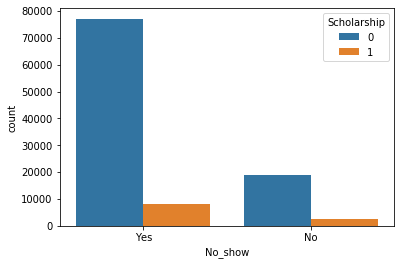

In [18]:
sns.countplot(x='No_show',hue='Scholarship',data=df);

> #### Based on the above graph, we can say that:<br>
>Patients without scholarship showed up more for the appointment than the patients without scholarship.<br>




#### Percentage of Patients showup for appointement with or without Scholarship

In [21]:
scholar_count=df['Scholarship'].value_counts()
scholar=calc_percent(height[0],scholar_count[1])
noscholar=calc_percent(hei[0],scholar_count[0])
print("Percentage of patients with scholarship and showed up for appointment {} %".format(scholar))
print("Percentage of patients without scholarship and showed up for appointment {} %".format(noscholar))

Percentage of patients with scholarship and showed up for appointment 76.21426588953649 %
Percentage of patients without scholarship and showed up for appointment 80.1357969492477 %


### Research Question3: How 'Age' variable affects the Noshow for an appointment?
> For the Solution of the question I have divided the Age Groups as follows:<br>
>  Division              AgeGroup<br>
>  Child                  [1-17]<br>
>  Adult                  [18-60]<br>
>  Old                    [61-above]<br>

In [22]:
  #Child Dataframe- Age[1-17]
child=df[df['Age']<18]
child_no=child[child['No_show']=='No']['Age'].value_counts().sum()
child_yes=child[child['No_show']=='Yes']['Age'].value_counts().sum()

  #Adult Dataframe- Age[18-60]
ad=df[(df['Age']>=18) & (df['Age']<=60)]
ad_no=ad[ad['No_show']=='No']['Age'].value_counts().sum()
ad_yes=ad[ad['No_show']=='Yes']['Age'].value_counts().sum()

  #Old Aged Dataframe-  Age[61-above]
old=df[df['Age']>60]
old_no=old[old['No_show']=='No']['Age'].value_counts().sum()
old_yes=old[old['No_show']=='Yes']['Age'].value_counts().sum()

#### Visualisation of the affect of Age on Noshow of the Appointment

Percentage of Adults patients showed up 78.9956138966899%
Percentage of Old aged patients showed up 84.79327969232327%
Percentage of Child patients showed up 77.52841981626746%


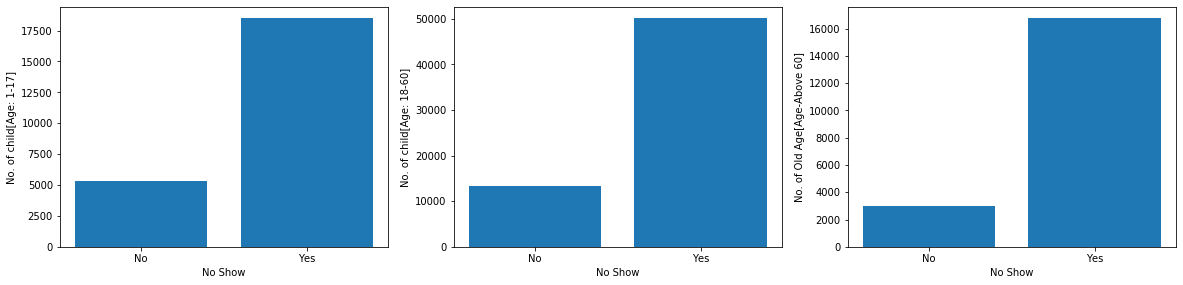

In [23]:
fig=plt.figure(figsize=(20,15))
plt.subplot(331)
plt.bar(x=['No','Yes'],height=[child_no,child_yes])
plt.xlabel("No Show")
plt.ylabel("No. of child[Age: 1-17]")
plt.subplot(332)
plt.bar(x=['No','Yes'],height=[ad_no,ad_yes])
plt.xlabel("No Show")
plt.ylabel("No. of child[Age: 18-60]")
plt.subplot(333)
plt.bar(x=['No','Yes'],height=[old_no,old_yes])
plt.xlabel("No Show")
plt.ylabel("No. of Old Age[Age-Above 60]")

per_ad= calc_percent(ad_yes,len(ad)) #(ad_yes/len(ad))*100
per_old=calc_percent(old_yes,len(old))#(old_yes/len(old))*100
per_child=calc_percent(child_yes,len(child))#(child_yes/len(child))*100
print("Percentage of Adults patients showed up {}%".format(per_ad))
print("Percentage of Old aged patients showed up {}%".format(per_old))
print("Percentage of Child patients showed up {}%".format(per_child))

> #### Based on the above graph, we can say that:<br>
>Adult patients are more as compared to Children and Old aged patients.<br>


### Research Question4: How the variables 'Hypertension','Diabetes','Alcoholism','Handicap' affect Noshow for an appointment?

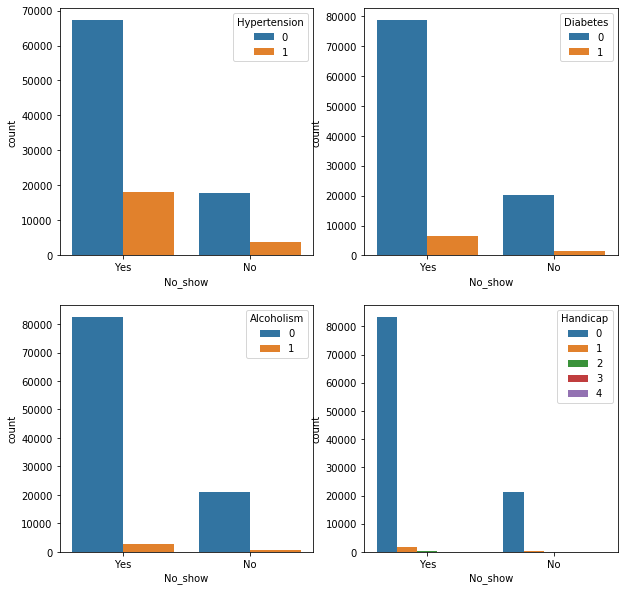

In [24]:
conditions=['Hypertension','Diabetes','Alcoholism','Handicap']
fig=plt.figure(figsize=(10,10))
for i, var in enumerate(conditions):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(x='No_show',hue=var,data=df)
    

>#### Based on the above subplots, we can say that:
>There are more patients with Hypertension, when compared to Diabetes,Alcoholism and Handicap.<br>

In [25]:
hyper_yes=(df['Hypertension']==1).value_counts()[1]
hypertension=df[df['Hypertension']==1]['No_show'].value_counts()[0]
print("Out of total people having hypertension, {} % of People showed up for appointment.".format(calc_percent(hypertension,hyper_yes)))

Out of total people having hypertension, 82.69804137424889 % of People showed up for appointment.


In [26]:
diab_yes=(df['Diabetes']==1).value_counts()[1]
diabetes=df[df['Diabetes']==1]['No_show'].value_counts()[0]
print("Out of total people having Diabetes, {} % of People showed up for appointment.".format(calc_percent(diabetes,diab_yes)))

Out of total people having Diabetes, 81.99672667757774 % of People showed up for appointment.


In [27]:
alc_yes=(df['Alcoholism']==1).value_counts()[1]
alcoholism=df[df['Alcoholism']==1]['No_show'].value_counts()[0]
print("Out of total people having Alcoholism, {} % of People showed up for appointment.".format(calc_percent(alcoholism,alc_yes)))

Out of total people having Alcoholism, 79.85119047619048 % of People showed up for appointment.


### Research Question5: How the SMS_recieved variable affect the Noshow of an appointment?

In [29]:
df_sms=df[df['SMS_received']==1]
h_sms=df_sms['No_show'].value_counts()

df_sms=df[df['SMS_received']==0]
h=df_sms['No_show'].value_counts()

print("No. of Patients recieved SMS and showed up: {}".format(h_sms[0]))
print("No. of Patients not recieved SMS and showed up: {}".format(h[0]))

No. of Patients recieved SMS and showed up: 25017
No. of Patients not recieved SMS and showed up: 60290


In [30]:
sms_val=df['SMS_received'].value_counts()
sms=calc_percent(h_sms[0],sms_val[1])
nosms=calc_percent(h[0],sms_val[0])
print("Percentage of people showed up for appointment with sms recieved is {}%".format(sms))
print("Percentage of people showed up for appointment with no sms recieved is {}%".format(nosms))

Percentage of people showed up for appointment with sms recieved is 72.33482723724158%
Percentage of people showed up for appointment with no sms recieved is 83.2769313645593%


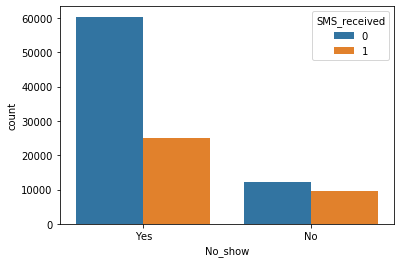

In [31]:
sns.countplot(x='No_show',hue='SMS_received',data=df);

> #### Based on the above graph, we can say that:
Patients who didnot recieved SMS showed up more than the people who recieved the SMS

### Research Question 6: How the Gender variable affect on the Noshow of an appointment?

In [107]:
# Total Male and Female Count
df['Gender'].value_counts()

F    70115
M    36867
Name: Gender, dtype: int64

In [108]:
df_fem=df[df['Gender']=='F']
val_fem=df_fem['No_show'].value_counts()
print("No. of Females showed up for appointment are: {}".format(val_fem[0]))
print("No. of Females not showed up for appointment are: {}".format(val_fem[1]))

No. of Females showed up for appointment are: 55843
No. of Females not showed up for appointment are: 14272


In [109]:
df_m=df[df['Gender']=='M']
val_m=df_m['No_show'].value_counts()
print("No. of males showed up for appointment are: {}".format(val_m[0]))
print("No. of males not showed up for appointment are: {}".format(val_m[1]))

No. of males showed up for appointment are: 29464
No. of males not showed up for appointment are: 7403


#### Visualisation of the Gender vs Noshow 

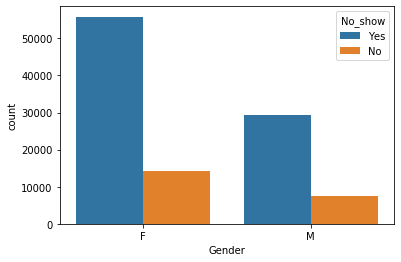

In [110]:
sns.countplot(x='Gender',hue='No_show',data=df);

> #### Based on the above graph we can say that:
Total number of feamles are more than males, but both genders showed up in same ratio.

### Research Question 7: How the variable 'Awaited_days'  affect on the Noshow for an appointment?

In [111]:
# No. of days awaited for the Appointment Date from the Scheduled Date
df['awaited_days'].value_counts().sort_index()

0      37154
1       5028
2       6636
3       2639
4       5212
       ...  
155       10
162       11
169        8
176       16
179       10
Name: awaited_days, Length: 129, dtype: int64

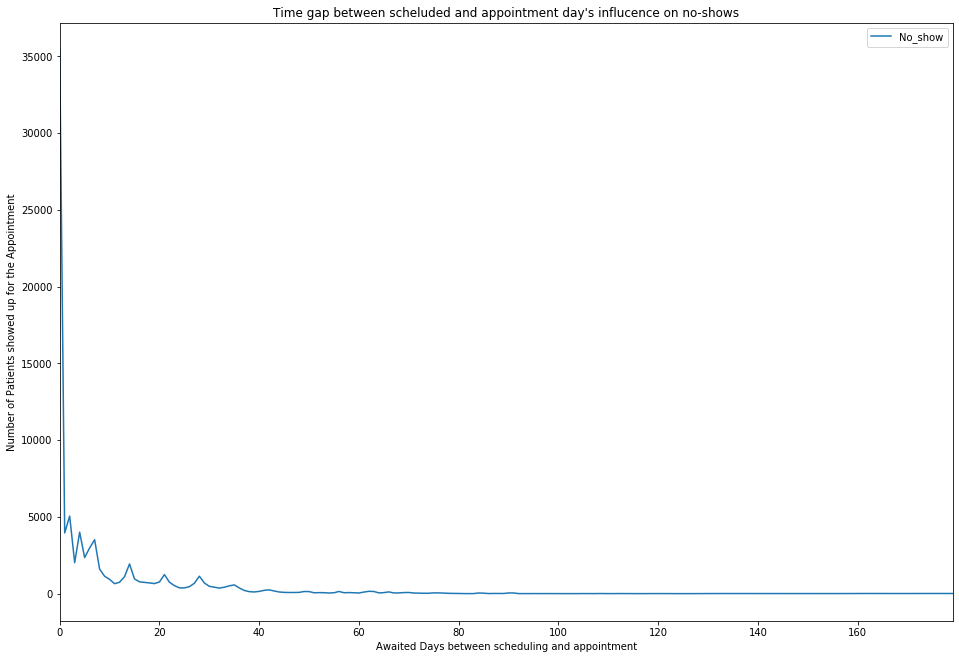

In [112]:
df_yes=df[df['No_show']=='Yes']
df_days = df_yes[['No_show', 'awaited_days']].groupby('awaited_days').count()
df_days.plot(kind='line', figsize=(16,11));
plt.title("Time gap between scheluded and appointment day's influcence on no-shows");
plt.xlabel('Awaited Days between scheduling and appointment')
plt.ylabel('Number of Patients showed up for the Appointment');

> #### Based on the above line chart, we could see that:
Less the number of awaiting days, more the Number of Patients show up for the appointment. <br>
As the number of awaiting days increase beyond 40 the graph becomes consistent.
